In [42]:
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
with open('data.json') as file:
    file_data = json.load(file)
print(file_data)

[{'_id': 'AYA NAKAMURA', 'concerts': {'2023-05-28T18:00:00': {'location': 'Paris', 'salle': 'Accorhotels Arena - Popb Bercy', 'price': None}, '2023-05-26T20:00:00': {'location': 'Paris', 'salle': 'Accorhotels Arena - Popb Bercy', 'price': None}, '2023-05-27T00:00:00': {'location': 'Paris', 'salle': 'Accorhotels Arena - Popb Bercy', 'price': None}}, 'spotify_id': '7IlRNXHjoOCgEAWN5qYksg', 'followers': {'13/01/2023': 3749329, '19/01/2023': 3761948, '20/01/2023': 3763975}, 'popularity': 72}, {'_id': 'TIAKOLA', 'concerts': {'2022-10-06T20:00:00': {'location': 'Lyon', 'salle': 'Ninkasi Gerland / Kao', 'price': None}, '2023-02-03T18:00:00': {'location': 'Reims', 'salle': 'Reims Arena', 'price': 35}, '2023-02-04T20:30:00': {'location': 'Saint Germain En Laye', 'salle': 'La Clef A Saint Germain En Laye', 'price': None}, '2023-02-10T20:30:00': {'location': 'Saint Malo', 'salle': 'La Nouvelle Vague A Saint Malo', 'price': None}, '2023-02-25T20:00:00': {'location': 'Chateaurenard', 'salle': "Sall

In [44]:
i = 0
for doc in file_data:
    count_concerts = 0
    if "followers" in doc.keys():
        for elem in doc["followers"]:
            print(elem)
            print(file_data[i]["followers"])
            file_data[i][elem] = file_data[i]["followers"][elem]
        del file_data[i]["followers"]
    if "concerts" in doc.keys():
        for elem in doc["concerts"]:
            count_concerts += 1
        file_data[i]["count_concerts"] = count_concerts
        del file_data[i]["concerts"]
    i += 1

13/01/2023
{'13/01/2023': 3749329, '19/01/2023': 3761948, '20/01/2023': 3763975}
19/01/2023
{'13/01/2023': 3749329, '19/01/2023': 3761948, '20/01/2023': 3763975}
20/01/2023
{'13/01/2023': 3749329, '19/01/2023': 3761948, '20/01/2023': 3763975}
13/01/2023
{'13/01/2023': 630498, '19/01/2023': 643069, '20/01/2023': 645064}
19/01/2023
{'13/01/2023': 630498, '19/01/2023': 643069, '20/01/2023': 645064}
20/01/2023
{'13/01/2023': 630498, '19/01/2023': 643069, '20/01/2023': 645064}
13/01/2023
{'13/01/2023': 4160205, '19/01/2023': 4176590, '20/01/2023': 4179212}
19/01/2023
{'13/01/2023': 4160205, '19/01/2023': 4176590, '20/01/2023': 4179212}
20/01/2023
{'13/01/2023': 4160205, '19/01/2023': 4176590, '20/01/2023': 4179212}
13/01/2023
{'13/01/2023': 7291529, '19/01/2023': 7302782, '20/01/2023': 7304686}
19/01/2023
{'13/01/2023': 7291529, '19/01/2023': 7302782, '20/01/2023': 7304686}
20/01/2023
{'13/01/2023': 7291529, '19/01/2023': 7302782, '20/01/2023': 7304686}
13/01/2023
{'13/01/2023': 408175, '19

In [45]:
print(file_data[0])

{'_id': 'AYA NAKAMURA', 'spotify_id': '7IlRNXHjoOCgEAWN5qYksg', 'popularity': 72, '13/01/2023': 3749329, '19/01/2023': 3761948, '20/01/2023': 3763975, 'count_concerts': 3}


In [46]:
import pandas as pd
df = pd.json_normalize(file_data)

In [47]:
df

,_id,spotify_id,popularity,13/01/2023,19/01/2023,20/01/2023,count_concerts
0,AYA NAKAMURA,7IlRNXHjoOCgEAWN5qYksg,72.0,3749329.0,3761948.0,3763975.0,3
1,TIAKOLA,3vUMXQ9kPnZAQkMkZZ7Hfh,75.0,630498.0,643069.0,645064.0,21
2,DAMSO,2UwqpfQtNuhBwviIC0f2ie,77.0,4160205.0,4176590.0,4179212.0,17
3,MUSE,12Chz98pHFMPJEknJQMWvI,77.0,7291529.0,7302782.0,7304686.0,7
4,LOUISE ATTAQUE,4CAsSAU842glNKJX71ndA9,59.0,408175.0,409596.0,409772.0,21
5,METALLICA,2ye2Wgw4gimLv2eAKyk1NB,83.0,23446408.0,23504100.0,23514159.0,4
6,-M- (MATTHIEU CHEDID),NaN,NaN,NaN,NaN,NaN,100
7,NEJ',2OHKEe204spO7G7NcbeO2o,70.0,3553506.0,3567023.0,3569283.0,18
8,STROMAE,5j4HeCoUlzhfWtjAfM1acR,75.0,2804105.0,2815212.0,2816855.0,48
9,RED HOT CHILI PEPPERS,0L8ExT028jH3ddEcZwqJJ5,83.0,18991766.0,19024390.0,19029693.0,3


In [50]:
df_only_date = df.drop(['_id', 'popularity', 'spotify_id', 'count_concerts'], axis=1)
max_date = max(df_only_date.columns)

In [51]:
df_only_date[max_date]

0      3763975.0
1       645064.0
2      4179212.0
3      7304686.0
4       409772.0
5     23514159.0
6            NaN
7      3569283.0
8      2816855.0
9     19029693.0
10      225995.0
11     5014775.0
12     1734602.0
13      180798.0
14           NaN
15      646468.0
16       89160.0
17      428864.0
18       13573.0
19      905489.0
20    44947158.0
21     4737587.0
22     2089447.0
23      238287.0
24      331082.0
25      680636.0
26      627521.0
27       67785.0
28           NaN
29           NaN
30      143608.0
31     1685174.0
32      522946.0
33     6610160.0
34      485083.0
35    41270696.0
36    45646574.0
37           NaN
38           NaN
39     1083574.0
40     1138125.0
41       80052.0
42           NaN
43      154884.0
44           NaN
45           NaN
46           NaN
47           NaN
48           NaN
49           NaN
50      959364.0
51     1423815.0
52      247597.0
53      556226.0
54       59506.0
55        5477.0
56     1452893.0
57     1402275.0
58     1819994

In [52]:
df_graph = df.sort_values(by=[max_date], ascending=False).head(10)

fig = go.Figure()
fig.add_trace(go.Bar(
     x=df_graph["_id"],
     y=df_graph[max_date],
     name=max_date,
     marker_color='lightsalmon'
 ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, title="")


In [53]:
df_graph = df.sort_values(by=["popularity"], ascending=False).head(10)

fig = go.Figure()
fig.add_trace(go.Bar(
     x=df_graph["_id"],
     y=df_graph["popularity"],
     name=max_date,
     marker_color='indianred'
 ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, title="")


In [58]:
df_graph = df.sort_values(by=["count_concerts"], ascending=False).head(10)

fig = go.Figure()
fig.add_trace(go.Bar(
     x=df_graph["_id"],
     y=df_graph["count_concerts"],
     name=max_date,
     marker_color='blue'
 ))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45, title="")


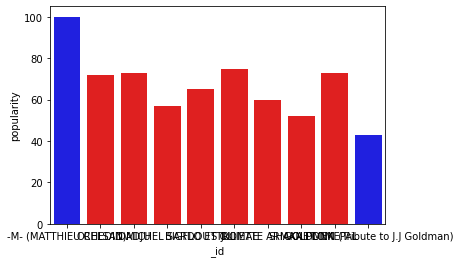

In [66]:
ax=plt.subplots()
 
df_graph = df.sort_values(by=["count_concerts"], ascending=False).head(10)

ax=sns.barplot(x=df_graph["_id"],y=df_graph["count_concerts"],color = 'b')
ax=sns.barplot(x=df_graph["_id"],y=df_graph["popularity"],color = 'r')
 
plt.show()

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")


# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

In [35]:
with open('uni_data.json') as file:
    file2_data = json.load(file)
print(file2_data)

[{'_id': 'AYA NAKAMURA', 'concerts': {'2023-05-28T18:00:00': {'location': 'Paris', 'salle': 'Accorhotels Arena - Popb Bercy', 'price': None}, '2023-05-26T20:00:00': {'location': 'Paris', 'salle': 'Accorhotels Arena - Popb Bercy', 'price': None}, '2023-05-27T00:00:00': {'location': 'Paris', 'salle': 'Accorhotels Arena - Popb Bercy', 'price': None}}, 'spotify_id': '7IlRNXHjoOCgEAWN5qYksg', 'followers': {'13/01/2023': 3749329, '19/01/2023': 3761948, '20/01/2023': 3763975}, 'popularity': 72}]


In [36]:
i = 0
for doc in file2_data:
    count_concerts = 0
    if "followers" in doc.keys():
        for elem in doc["followers"]:
            print(elem)
            print(file2_data[i]["followers"])
            file2_data[i][elem] = file2_data[i]["followers"][elem]
        del file2_data[i]["followers"]
    if "concerts" in doc.keys():
        for elem in doc["concerts"]:
            count_concerts += 1
        file2_data[i]["numb_concerts"] = count_concerts
        del file2_data[i]["concerts"]
    i += 1

13/01/2023
{'13/01/2023': 3749329, '19/01/2023': 3761948, '20/01/2023': 3763975}
19/01/2023
{'13/01/2023': 3749329, '19/01/2023': 3761948, '20/01/2023': 3763975}
20/01/2023
{'13/01/2023': 3749329, '19/01/2023': 3761948, '20/01/2023': 3763975}


In [37]:
file2_data

[{'_id': 'AYA NAKAMURA',
  'spotify_id': '7IlRNXHjoOCgEAWN5qYksg',
  'popularity': 72,
  '13/01/2023': 3749329,
  '19/01/2023': 3761948,
  '20/01/2023': 3763975,
  'numb_concerts': 3}]

In [38]:
df2 = pd.json_normalize(file2_data)

In [39]:
df3 = pd.melt(df2, id_vars=["_id", "spotify_id", "popularity", "numb_concerts"], 
                  var_name="date", value_name="followers")

In [40]:
df3

,_id,spotify_id,popularity,numb_concerts,date,followers
0,AYA NAKAMURA,7IlRNXHjoOCgEAWN5qYksg,72,3,13/01/2023,3749329
1,AYA NAKAMURA,7IlRNXHjoOCgEAWN5qYksg,72,3,19/01/2023,3761948
2,AYA NAKAMURA,7IlRNXHjoOCgEAWN5qYksg,72,3,20/01/2023,3763975


<AxesSubplot:xlabel='date', ylabel='followers'>

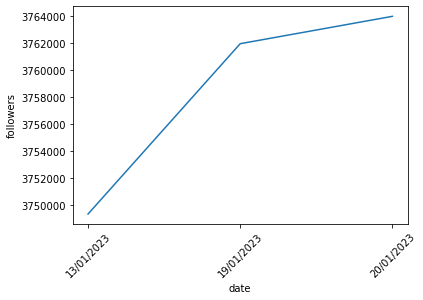

In [61]:
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
sns.lineplot(x="date", y="followers",
             data=df3)

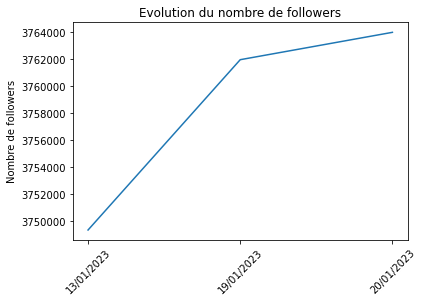

In [70]:
plt.plot(df3['date'], df3['followers'])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.title('Evolution du nombre de followers')
plt.ylabel('Nombre de followers')
plt.show()